In [1]:
# EXAMPLE 1 - clustering for image segmentation
# colour segmentation - assign pixels to the same segment if they have similar colour

In [17]:
import os
import urllib.request
from matplotlib.image import imread
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [8]:
# Download the ladybug image
PROJECT_ROOT_DIR = "."
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\unsupervised_learning\\ladybug.png',
 <http.client.HTTPMessage at 0x12e25dfe790>)

In [9]:
# load the image
image = imread(os.path.join("images", "unsupervised_learning", "ladybug.png"))

In [10]:
image.shape

(533, 800, 3)

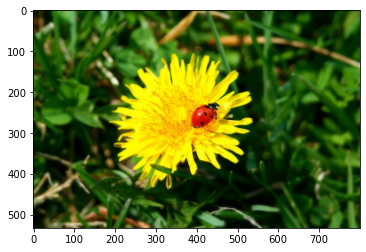

In [20]:
# show the original image
plt.imshow(image)

In [11]:
# reshape the image into a list of rgb colours
X = image.reshape(-1, 3)

In [15]:
# cluster the colours using k-means
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

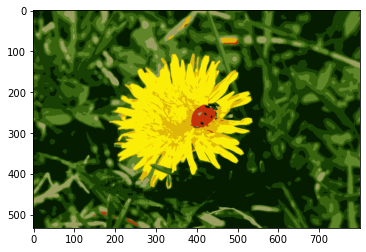

In [21]:
# image after image segmentation with 8 colour clusters
plt.imshow(segmented_img)

In [22]:
kmeans = KMeans(n_clusters=2).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

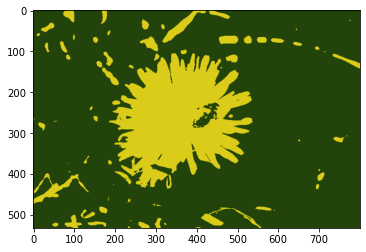

In [23]:
# image after image segmentation with 2 colour clusters
plt.imshow(segmented_img)

In [24]:
# EXAMPLE 2 -clustering for preprocessing
# use as dimension reduction - preprocessing step for a supervised learning algorithm

In [28]:
# use digits dataset - 1797 grayscale images of digits 0 to 9
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [29]:
X_digits, y_digits = load_digits(return_X_y=True)

In [30]:
# split into training and test
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [33]:
# train a logistic regression model and evaluate its accuracy
log_reg = LogisticRegression(max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, random_state=42)

In [34]:
log_reg.score(X_test, y_test)

0.9644444444444444

In [37]:
# use k-means as a preprocessing step
# create a pipeline that clusters the training set amd replaces the images with distances from clusters. Then perform logistic regression
# use grid search cross validation to find the optimal amount of clusters
# note - you might think there should be 10 clusters as there are 10 digits. However it will likely be more as digits can be drawn in different ways

In [41]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [43]:
param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. kmeans__n_clusters=2, total=   7.4s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   6.9s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   8.6s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   8.6s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   9.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=  12.4s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   8.7s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=  11.4s
[CV] kmeans__n_clusters=4 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed: 60.0min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [44]:
# the optimal amount of clusters
grid_clf.best_params_

{'kmeans__n_clusters': 87}

In [45]:
grid_clf.score(X_test, y_test)

0.9711111111111111

In [ ]:
# using k-means as a preprocessing step, with k=87, the accuracy improved to 97.1% from 96.4%